In [1]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# read local csv files and put into data frames
data_url = '17zpallnoagi.csv'
zpallnoagi_csv = pd.read_csv(data_url)
raw_tax_df = pd.DataFrame(zpallnoagi_csv)
display(raw_tax_df)
mhi_data_url = 'MarketHealthIndex_Zip.csv'
market_health_csv = pd.read_csv(mhi_data_url, on_bad_lines='skip', encoding = "ISO-8859-1")
market_health_df = pd.DataFrame(market_health_csv)

,STATEFIPS,STATE,ZIPCODE,AGI_STUB,N1,MARS1,MARS2,MARS4,ELF,CPREP,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
0,1,AL,0,0,2033660.0,841450.0,748460.0,402300.0,1825940.0,106040.0,...,31890.0,112620.0,382910.0,1842204.0,1608610.0,5145662.0,1579020.0,4641848.0,32240.0,447705.0
1,1,AL,35004,0,5130.0,2140.0,2120.0,780.0,4660.0,270.0,...,30.0,32.0,970.0,2693.0,4090.0,11048.0,4020.0,10706.0,70.0,308.0
2,1,AL,35005,0,3170.0,1350.0,870.0,900.0,2840.0,150.0,...,0.0,0.0,450.0,964.0,2660.0,7591.0,2640.0,7552.0,0.0,0.0
3,1,AL,35006,0,1210.0,440.0,580.0,170.0,1120.0,50.0,...,0.0,0.0,190.0,466.0,990.0,2822.0,990.0,2812.0,0.0,0.0
4,1,AL,35007,0,11930.0,4720.0,5180.0,1790.0,10270.0,990.0,...,110.0,90.0,2720.0,9363.0,8960.0,24472.0,8840.0,23758.0,150.0,664.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27755,56,WY,83126,0,180.0,60.0,110.0,0.0,170.0,0.0,...,0.0,0.0,40.0,96.0,130.0,351.0,130.0,338.0,0.0,0.0
27756,56,WY,83127,0,1550.0,500.0,890.0,90.0,1290.0,120.0,...,40.0,95.0,460.0,2809.0,1040.0,2934.0,980.0,2594.0,80.0,275.0
27757,56,WY,83128,0,950.0,480.0,400.0,60.0,820.0,90.0,...,30.0,164.0,270.0,1285.0,670.0,4016.0,620.0,1774.0,50.0,1440.0
27758,56,WY,83414,0,220.0,80.0,130.0,0.0,210.0,0.0,...,30.0,246.0,60.0,830.0,130.0,1161.0,120.0,645.0,30.0,1670.0


In [4]:
# Columns used for both sets
market_health_cols = ['RegionName','MarketHealthIndex','SellForGain','ForeclosureRatio','NegativeEquity','Delinquency',
                      'DaysOnMarket','ZHVI']

zip_tax_cols = ['ZIPCODE','MARS1','MARS2','MARS4','NUMDEP','A00100','N02650', 'A02650','A00200','A00300', 'A00900',
                'A01000','A01700','SCHF','A02300','A02500','N26270','N03220','A03300','N03150','N03210','N03230',
                'A17000','A18425','A18500','A19300','N19570','A19700','A20950','N04800','A04800','A07300','N07180',
                'A07180','N07220','A07220','N09400','A09400','A10600','N11070','A11070','N06500','A06500','A85300']

# filtered and merged together raw data sets 
tax_zip_df = raw_tax_df.filter(zip_tax_cols)
mh_df = market_health_df.filter(market_health_cols, axis=1)
merged_df = pd.merge(tax_zip_df, mh_df, left_on="ZIPCODE", right_on="RegionName")
# meaned out rows with same zip code and dropped the duplicate RegionName / zip field
# grouped_df = merged_df.groupby('zipcode').mean().reset_index()
grouped_df = merged_df.drop(columns=['RegionName'])
# most simpliest data frame
display(grouped_df)


,ZIPCODE,MARS1,MARS2,MARS4,NUMDEP,A00100,N02650,A02650,A00200,A00300,...,N06500,A06500,A85300,MarketHealthIndex,SellForGain,ForeclosureRatio,NegativeEquity,Delinquency,DaysOnMarket,ZHVI
0,35004,2140.0,2120.0,780.0,3350.0,289966.0,5130.0,292671.0,236776.0,902.0,...,3870.0,27796.0,32.0,4.893179,NaN,NaN,0.092712,0.026738,76.0,147100.0
1,35005,1350.0,870.0,900.0,2230.0,124916.0,3170.0,125810.0,102620.0,261.0,...,2010.0,9187.0,0.0,0.887927,40.00,2.9443,0.250780,0.082988,80.0,75000.0
2,35006,440.0,580.0,170.0,820.0,59411.0,1210.0,59725.0,46012.0,106.0,...,870.0,5089.0,0.0,6.796082,NaN,NaN,0.221277,0.019231,84.0,78500.0
3,35007,4720.0,5180.0,1790.0,8840.0,706211.0,11930.0,714402.0,555765.0,1832.0,...,8520.0,72973.0,90.0,5.600114,84.62,0.6175,0.066375,0.037618,55.0,157700.0
4,35010,3000.0,2710.0,2060.0,5850.0,387333.0,7890.0,391523.0,262452.0,3394.0,...,4740.0,37697.0,688.0,6.150898,NaN,NaN,0.192933,0.017442,147.0,105300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13998,54970,650.0,560.0,150.0,630.0,57723.0,1360.0,58115.0,43406.0,223.0,...,940.0,4676.0,0.0,3.277734,NaN,NaN,0.170391,0.016393,125.0,111500.0
13999,54971,2660.0,2100.0,450.0,2490.0,288010.0,5230.0,292186.0,206390.0,1779.0,...,3870.0,30295.0,252.0,6.104053,NaN,NaN,0.071623,0.028571,80.0,127100.0
14000,54974,330.0,380.0,50.0,430.0,45633.0,780.0,46312.0,35437.0,98.0,...,640.0,4240.0,0.0,6.771240,NaN,NaN,0.060201,0.000000,80.0,160400.0
14001,54979,340.0,380.0,50.0,350.0,45874.0,770.0,46668.0,34219.0,107.0,...,620.0,4493.0,0.0,8.254667,NaN,NaN,0.050000,0.000000,70.0,176000.0


In [5]:
# splitting data 
# df_eda is 80% of random data, df_holdout is 20% of the remaining data
df_eda, df_holdout = train_test_split(grouped_df, test_size=0.20, random_state=22)
print("80% of grouped_df", .8 * len(grouped_df))
print("len of df_eda", len(df_eda))
display(df_eda)

80% of grouped_df 11202.400000000001
len of df_eda 11202


,ZIPCODE,MARS1,MARS2,MARS4,NUMDEP,A00100,N02650,A02650,A00200,A00300,...,N06500,A06500,A85300,MarketHealthIndex,SellForGain,ForeclosureRatio,NegativeEquity,Delinquency,DaysOnMarket,ZHVI
9140,13850,4710.0,4340.0,710.0,5100.0,806571.0,9940.0,818461.0,517408.0,5937.0,...,7780.0,113416.0,916.0,2.586415,81.82,NaN,0.101289,0.066667,92.0,128500.0
5412,20616,1690.0,920.0,800.0,2500.0,238866.0,3550.0,239927.0,202262.0,329.0,...,2740.0,23869.0,15.0,5.138051,100.00,NaN,0.244229,0.097561,93.5,263200.0
5885,1566,1640.0,1540.0,240.0,1790.0,315416.0,3480.0,318920.0,233627.0,1759.0,...,2880.0,46088.0,189.0,6.323373,100.00,NaN,0.085440,0.081633,76.0,274200.0
4476,46815,6620.0,4850.0,1710.0,7980.0,659101.0,13410.0,666299.0,489028.0,3480.0,...,9400.0,61711.0,161.0,2.110867,NaN,NaN,0.057726,0.047138,49.0,117400.0
12991,23223,13650.0,3550.0,6570.0,14020.0,1010689.0,24430.0,1021980.0,844452.0,1532.0,...,15710.0,99345.0,183.0,2.631840,76.47,6.3815,0.163589,0.034208,63.0,140900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5478,20764,1050.0,790.0,230.0,1060.0,170241.0,2140.0,172263.0,123188.0,1039.0,...,1730.0,21576.0,98.0,0.962453,66.67,2.1673,0.094488,0.154762,84.0,297200.0
8548,11420,10820.0,6310.0,5870.0,14790.0,1017704.0,23560.0,1025701.0,865399.0,2268.0,...,15380.0,84131.0,102.0,9.148272,100.00,NaN,0.059478,0.244604,173.5,482700.0
13100,24087,680.0,650.0,200.0,880.0,71298.0,1570.0,71990.0,56248.0,154.0,...,1080.0,6466.0,0.0,1.754560,NaN,NaN,0.071685,0.050000,71.0,152600.0
6276,48140,680.0,750.0,120.0,890.0,104425.0,1580.0,105704.0,77579.0,388.0,...,1230.0,11714.0,0.0,3.716374,NaN,NaN,0.080769,0.000000,81.0,164600.0


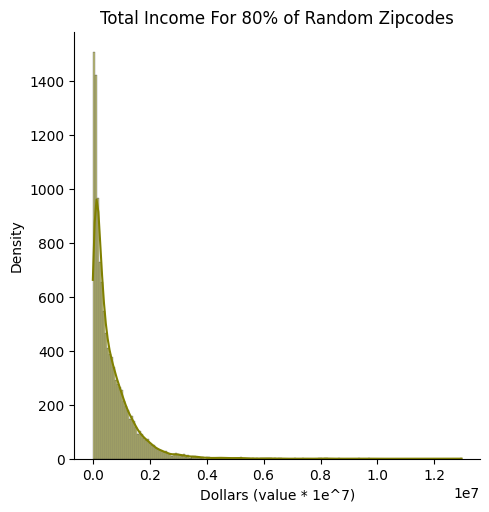

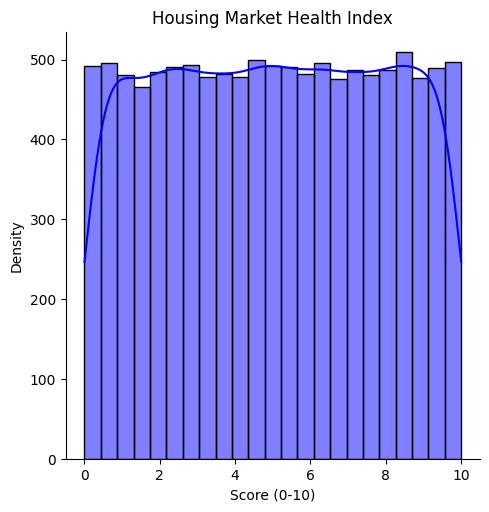

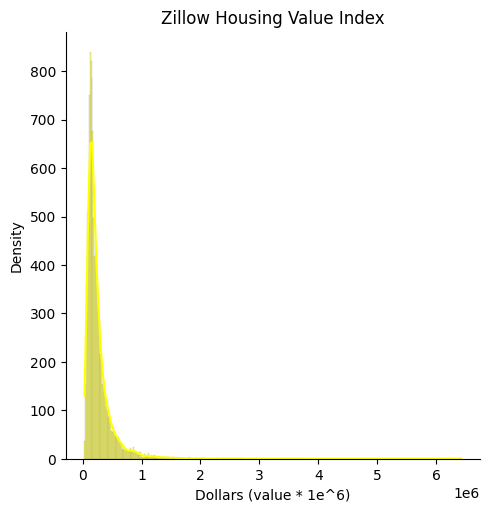

In [50]:
# different graphical display of data

# sns.pairplot(df_eda[['A02650', 'MarketHealthIndex', 'ZHVI']])

# two histogram options seperated and together
# together

ax1 = sns.displot(df_eda, x=df_eda['A02650'],  kde = True, color="olive", label = 'income')
# ax1.set(xticks=(0,9000000))

plt.title('Total Income For 80% of Random Zipcodes')
plt.xlabel('Dollars (value * 1e^7)')
plt.ylabel('Density')


sns.displot(df_eda, x=df_eda['MarketHealthIndex'], kde = True, color="blue", label = 'market_health_index')

plt.title('Housing Market Health Index')
plt.xlabel('Score (0-10)')
plt.ylabel('Density')

sns.displot(df_eda, x=df_eda['ZHVI'], kde = True, color="yellow", label = 'zillow_housing_value_index')

plt.title('Zillow Housing Value Index')
plt.xlabel('Dollars (value * 1e^6)')
plt.ylabel('Density')

f.tight_layout()



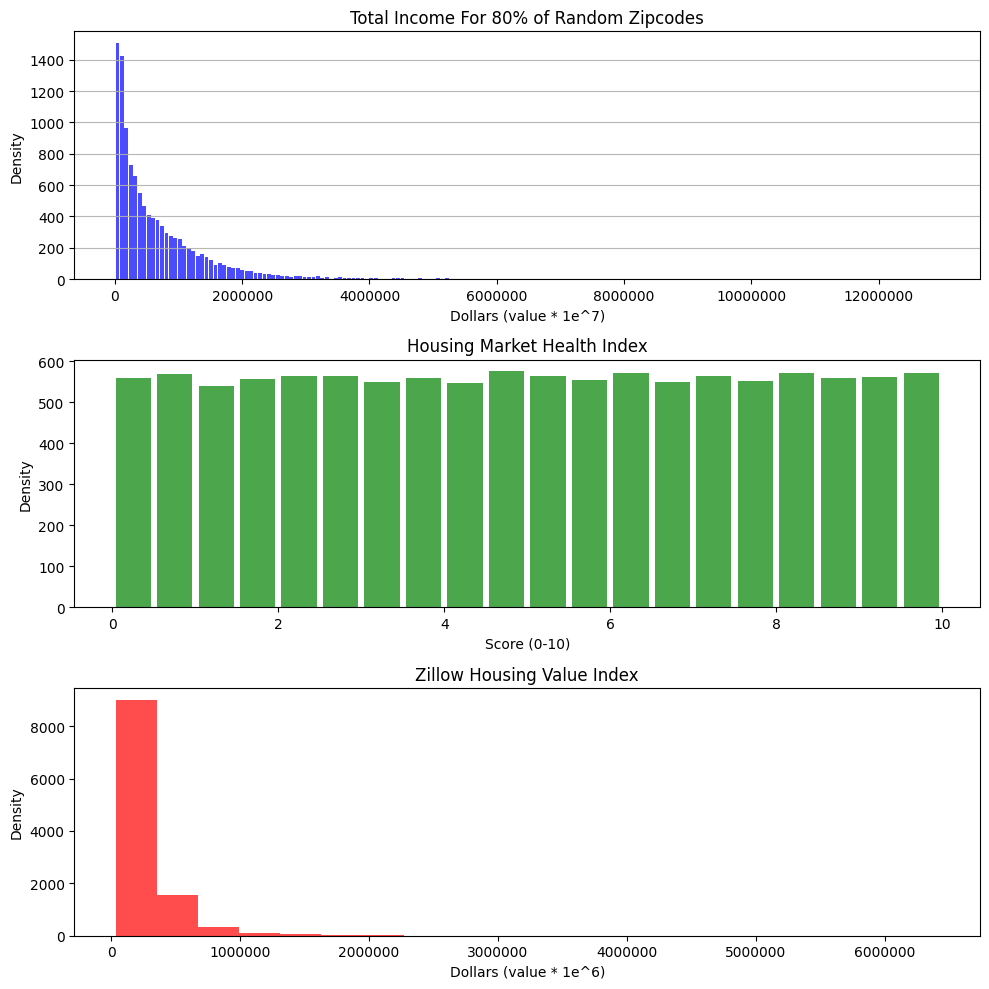

In [56]:
fig, axs = plt.subplots(3, figsize=(10,10))

axs[0].ticklabel_format(axis='both', style='plain')

# Create a histogram for 'income'
axs[0].hist(df_eda['A02650'], bins='auto', color='blue', alpha=0.7, rwidth=0.85)
axs[0].grid(axis='y', alpha=0.9)
axs[0].set_title('Total Income For 80% of Random Zipcodes')
axs[0].set_xlabel('Dollars (value * 1e^7)')
axs[0].set_ylabel('Density')

# Create a histogram for 'market_health_index'
axs[1].hist(df_eda['MarketHealthIndex'], bins=20, color='green', alpha=0.7, rwidth=0.85)
axs[1].set_title('Housing Market Health Index')
axs[1].set_xlabel('Score (0-10)')
axs[1].set_ylabel('Density')


# Create a histogram for 'zillow_housing_value_index'
axs[2].hist(df_eda['ZHVI'], bins=20, color='red', alpha=0.7)
axs[2].ticklabel_format(axis='both', style='plain')
axs[2].ticklabel_format(axis='both', style='plain')
axs[2].set_title('Zillow Housing Value Index')
axs[2].set_xlabel("Dollars (value * 1e^6)")
axs[2].set_ylabel("Density")

plt.tight_layout()